In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

Using TensorFlow backend.


In [2]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.

  return results


In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s - loss: 7.0387e-04 - acc: 0.9999 - val_loss: 0.9404 - val_acc: 0.8619
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 2.2124e-04 - acc: 1.0000 - val_loss: 0.9741 - val_acc: 0.8615
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.0014 - acc: 0.9995 - val_loss: 1.0067 - val_acc: 0.8615
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 1.2596e-04 - acc: 1.0000 - val_loss: 1.0172 - val_acc: 0.8607
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 9.7671e-05 - acc: 1.0000 - val_loss: 1.0378 - val_acc: 0.8614
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 7.8470e-05 - acc: 1.0000 - val_loss: 1.2033 - val_acc: 0.8546
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 8.0973e-04 - acc: 0.9999 - val_loss: 1.0879 - val_acc: 0.8593
Epoch 8/20
15000/15000 [=============

In [15]:
import matplotlib.pyplot as plt

/Users/joliv/Dev/deep-learning-python/env/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [26]:
history_dict = history.history
epochs = range(1, len(loss_values) + 1)

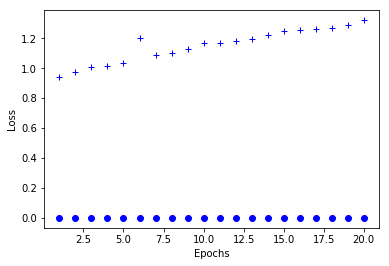

In [27]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

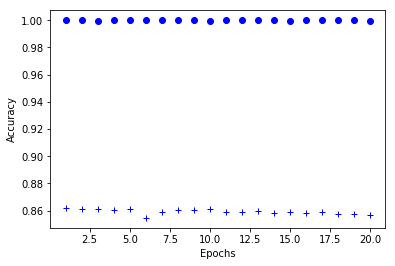

In [28]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [29]:
word_index = imdb.get_word_index()
some_review = 'the movie sucks everything is terrible i would not watch it again horrible awful'
encoded_review = [1] + map(lambda s: word_index.get(s, -1) + 3, some_review.split(' '))
print model.predict(vectorize_sequences([encoded_review]))

[[ 0.00128485]]
